In [1]:
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util
import numpy as np


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30)
sim.add_dipole(0,0.1,0,1,0,0)
sim.add_dipole(0.1,0,0,0,2,0)

In [3]:
positions, values = sim.get_data()

positions, values = util.shuffle_data(positions, values)

In [4]:
models = []
moments = [1, 2, 3, 4, 8]
maxmodels = len(moments)

for i in range(maxmodels):
    models.append(MultiPoleModel(moments=moments[i], lrate=0.25e6, krate=0.25e6))



In [5]:
test_epochs = 20

In [6]:
# train the models on a smaller number of epochs
for i in range(maxmodels):
    print("----- Model ", i, " -----")
    models[i].fit(positions, values, epochs=test_epochs)

----- Model  0  -----
epoch  0 --- Loss --- 1.2614925e-05
epoch  1 --- Loss --- 9.704659e-06
epoch  2 --- Loss --- 6.0910047e-06
epoch  3 --- Loss --- 4.2485917e-06
epoch  4 --- Loss --- 2.8405557e-06
epoch  5 --- Loss --- 1.8577252e-06
epoch  6 --- Loss --- 1.1364317e-06
epoch  7 --- Loss --- 6.5913144e-07
epoch  8 --- Loss --- 4.2478237e-07
epoch  9 --- Loss --- 3.4819416e-07
epoch  10 --- Loss --- 2.2404427e-07
epoch  11 --- Loss --- 2.1442831e-07
epoch  12 --- Loss --- 1.6578916e-07
epoch  13 --- Loss --- 2.116563e-07
epoch  14 --- Loss --- 1.559282e-07
epoch  15 --- Loss --- 3.830111e-07
epoch  16 --- Loss --- 4.064252e-07
epoch  17 --- Loss --- 3.004142e-06
epoch  18 --- Loss --- 1.0394522e-06
epoch  19 --- Loss --- 4.116454e-07
----- Model  1  -----
epoch  0 --- Loss --- 1.2783481e-05
epoch  1 --- Loss --- 8.002004e-06
epoch  2 --- Loss --- 3.340854e-06
epoch  3 --- Loss --- 1.120651e-06
epoch  4 --- Loss --- 4.6101542e-07
epoch  5 --- Loss --- 2.3247996e-07
epoch  6 --- Loss --

In [7]:
# find the model with the smallest fit error
for i in range(maxmodels):
    print("moments: ", moments[i], "Loss: ", models[i].loss_history[-1])

moments:  1 Loss:  4.116454e-07
moments:  2 Loss:  1.6872545e-07
moments:  3 Loss:  4.4456506e-08
moments:  4 Loss:  1.9777564e-08
moments:  8 Loss:  4.28122e-09


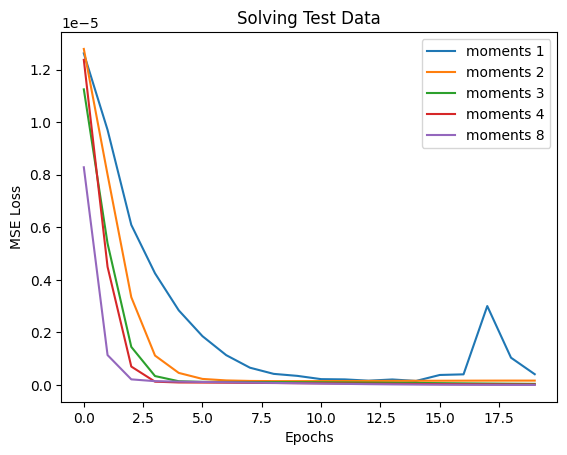

In [8]:
import matplotlib.pyplot as plt

x = range(test_epochs)

# plot lines 
for i in range(maxmodels):
    plt.plot(x, models[i].loss_history, label = "moments " + str(moments[i]))
 
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title('Solving Test Data')
plt.legend() 
plt.show()

In [9]:
print("[Position, Value]")
for i in range(maxmodels):
    print(models[i].moment())

[Position, Value]
[[array([[ 0.04571695,  0.01426835, -0.00012341]], dtype=float32), array([[0.9785505 , 1.9721221 , 0.00371585]], dtype=float32)]]
[[array([[0.02163936, 0.09704456, 0.02399835]], dtype=float32), array([[0.64475256, 0.9607796 , 0.03200924]], dtype=float32)], [array([[ 0.17694776, -0.00114968, -0.02293235]], dtype=float32), array([[ 0.29086295,  1.0618863 , -0.0355674 ]], dtype=float32)]]
[[array([[ 0.03970949, -0.07985839,  0.07205738]], dtype=float32), array([[0.3354668 , 0.62304676, 0.08862006]], dtype=float32)], [array([[ 0.21639884,  0.00285196, -0.04141432]], dtype=float32), array([[ 0.1223179 ,  0.84074926, -0.06851611]], dtype=float32)], [array([[0.00747589, 0.18117522, 0.0019845 ]], dtype=float32), array([[0.5043534 , 0.50445807, 0.00190295]], dtype=float32)]]
[[array([[-0.03306891,  0.08934075,  0.08992449]], dtype=float32), array([[0.46329072, 0.39102584, 0.11229598]], dtype=float32)], [array([[ 0.12555686, -0.12272355, -0.00865358]], dtype=float32), array([[ 

In [ ]:
print("Dipoles")
for i in range(maxmodels):
    print(models[i].dipole())